**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings('ignore')


## Data Collection and Pre-processing

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv') 

In [ ]:
#first 5 rows of dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# Features data-type
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Statistical summary
diabetes_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# Count of null values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Observations**

1. There are total 768 records and 9 features in dataset
2. The datatype of the features are either integer or float
3. In the outcome 0-----> non-diabetic and 1------>diabetic 
4.  Some features have zero values which represents missing values --->So replacing it with NaN values
 



In [ ]:
diabetes_dataset_copy = diabetes_dataset.copy(deep = True)
diabetes_dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
# Showing the Count of NANs
diabetes_dataset_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Data Visualization

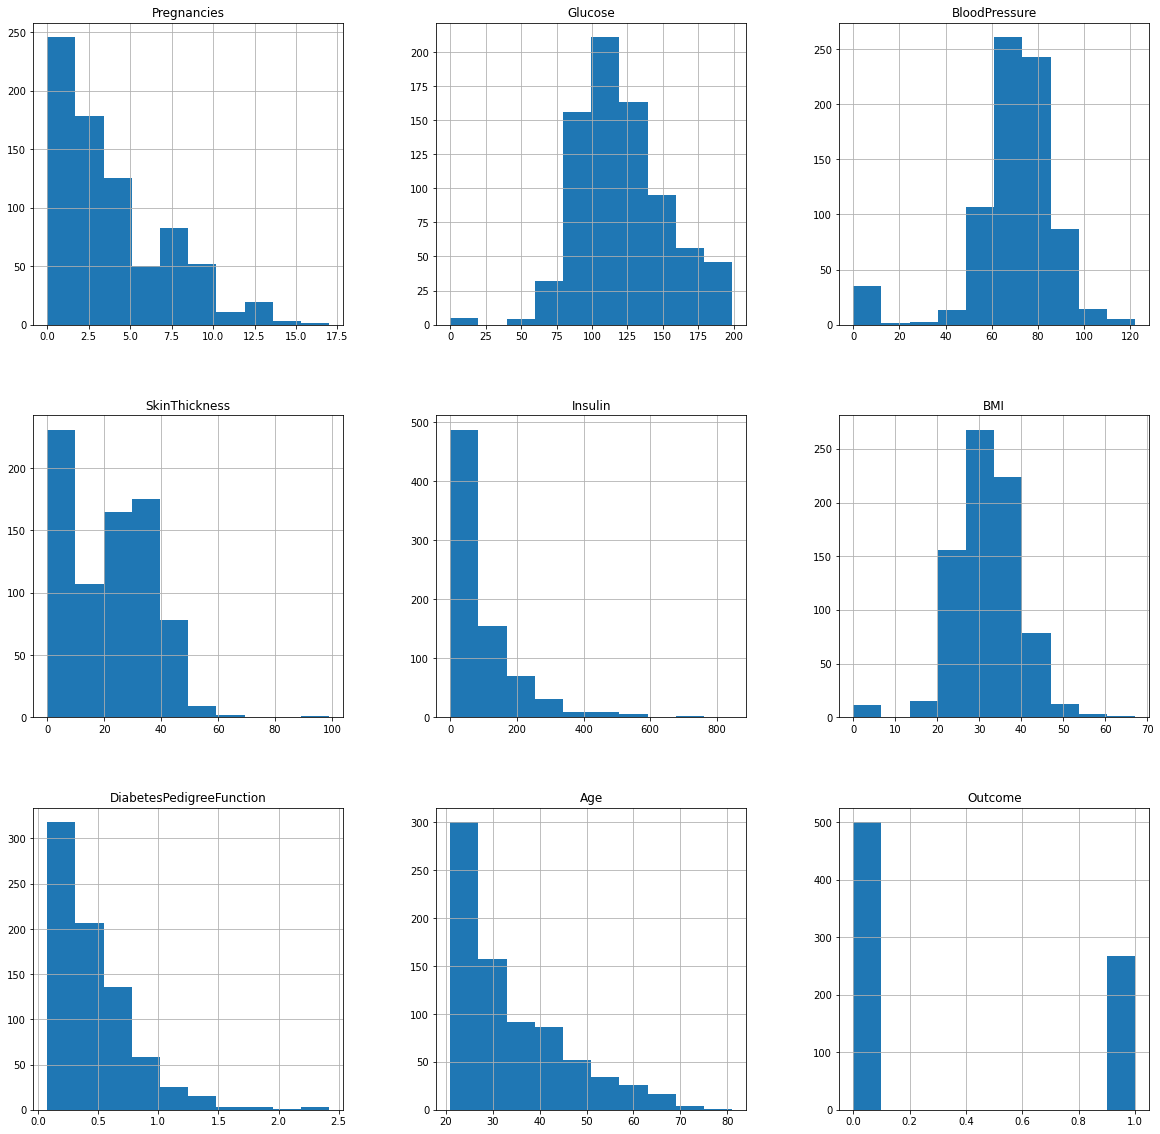

In [ ]:
diabetes_dataset.hist(figsize = (20,20))
plt.show()

Inference ---> In every graph some values are 
in out of range 

In [ ]:
#Replacing the Nan values with mean or median
diabetes_dataset_copy['Glucose'].fillna(diabetes_dataset_copy['Glucose'].mean(),inplace = True)
diabetes_dataset_copy['BloodPressure'].fillna(diabetes_dataset_copy['BloodPressure'].mean(),inplace = True)
diabetes_dataset_copy['SkinThickness'].fillna(diabetes_dataset_copy['SkinThickness'].median(),inplace = True)
diabetes_dataset_copy['Insulin'].fillna(diabetes_dataset_copy['Insulin'].median(), inplace = True)
diabetes_dataset_copy['BMI'].fillna(diabetes_dataset_copy['BMI'].median(),inplace = True)

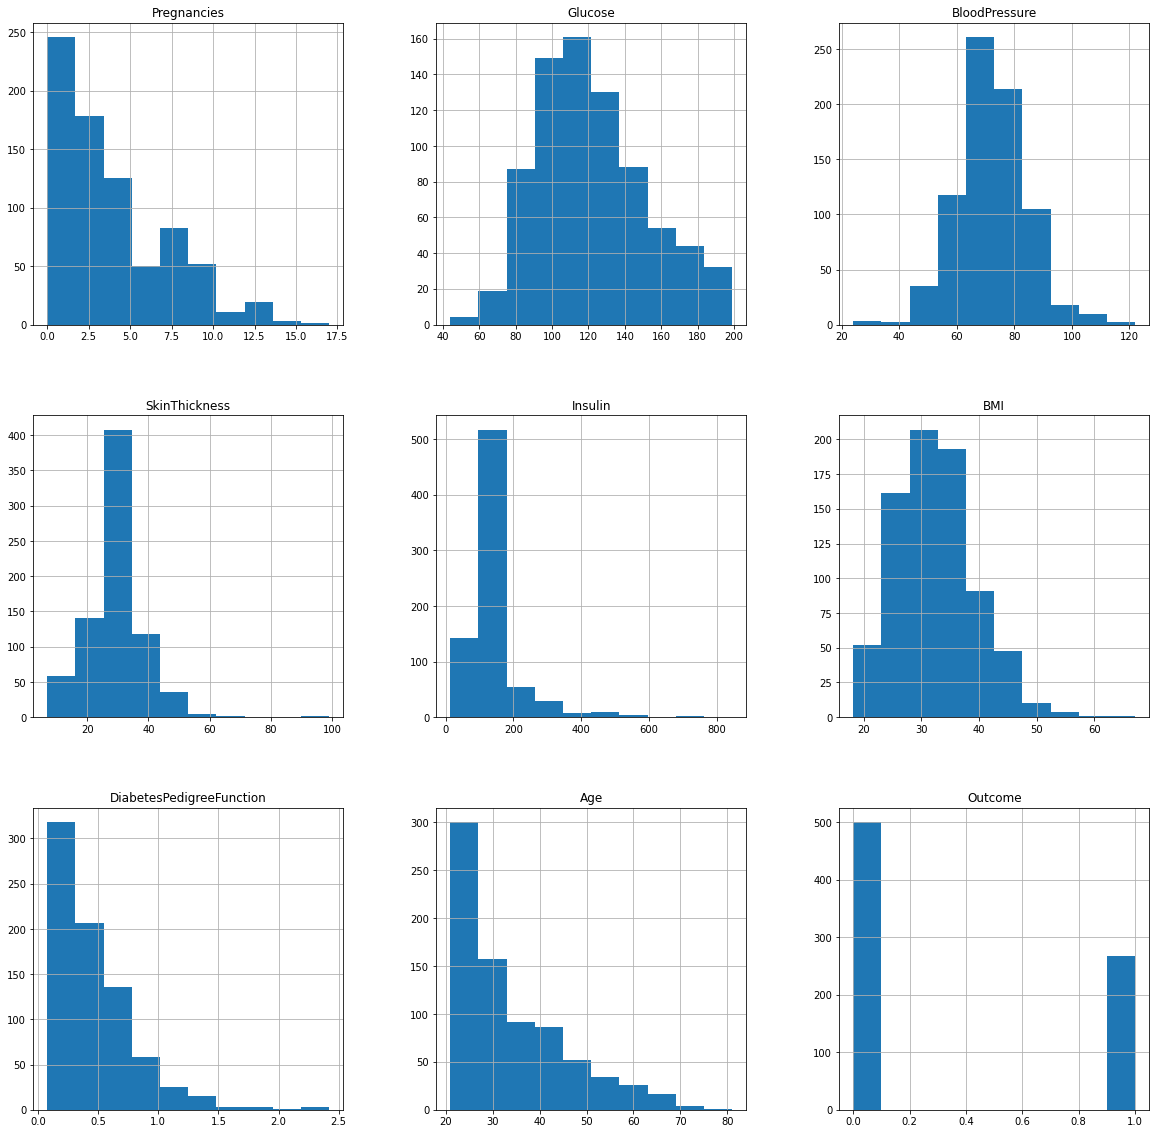

In [ ]:
#ploting after replacing the Nan values
diabetes_dataset_copy.hist(figsize = (20,20))
plt.show()

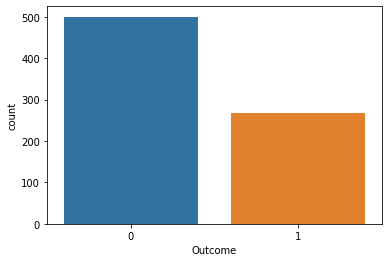

In [ ]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = diabetes_dataset_copy)
plt.show()

The countplot tells us that the dataset is imbalanced, as number of patients who don't have diabetes is more than those who do

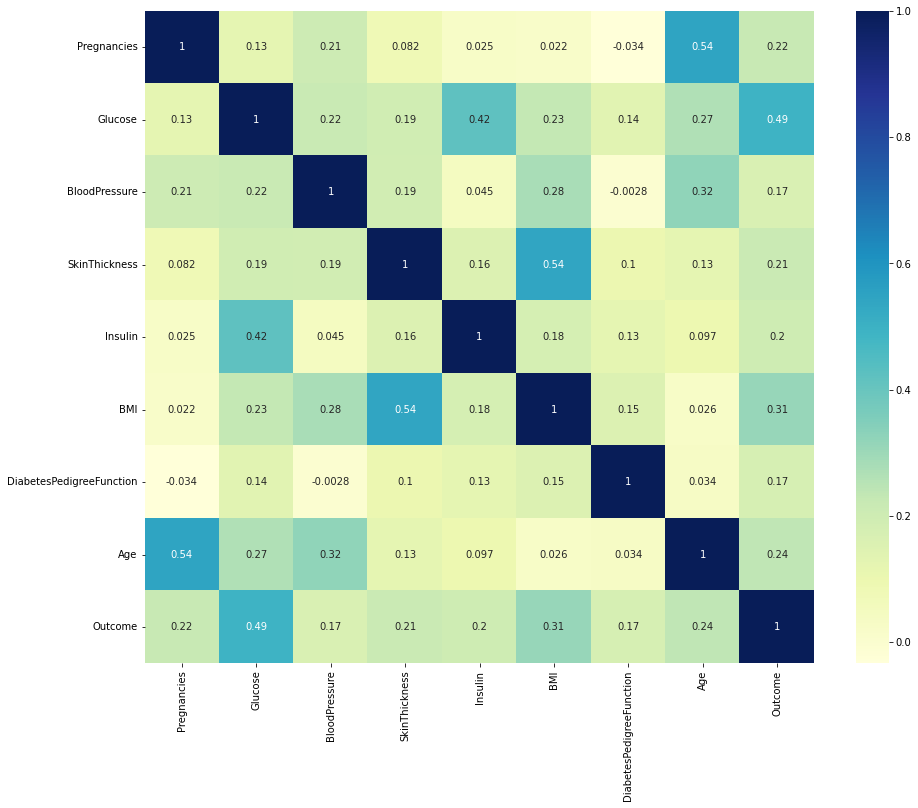

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(diabetes_dataset_copy.corr(), annot=True,cmap ='YlGnBu')
plt.show()

## Data Standardization

In [ ]:
# separating the data and labels
X = diabetes_dataset_copy.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset_copy['Outcome']

In [ ]:
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(diabetes_dataset_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure',
'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Model Building

In [ ]:
#spliting the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33,random_state=7)

In [ ]:
print('The Shape of X',X.shape)
print('The Shape of X_train',X_train.shape)
print('The Shape of X_test',X_test.shape)

The Shape of X (768, 8)
The Shape of X_train (514, 8)
The Shape of X_test (254, 8)


## Support Vector Machine

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, Y_train)

SVC()

In [ ]:
#prediction
svc_pred = svc_model.predict(X_test)

In [ ]:
#accuracy score
test_data_accuracy = accuracy_score(svc_pred, Y_test)
print('Accuracy score of the SVM model: ', test_data_accuracy)

Accuracy score of the SVM model:  0.7716535433070866


## Decision tree

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
#prediction
predictions = dtree.predict(X_test)

In [ ]:
#accuracy score
test_data_accuracy = accuracy_score(predictions, Y_test)
print('Accuracy score of the decision tree model: ', test_data_accuracy)

Accuracy score of the decision tree model:  0.7519685039370079


In [ ]:
#confusion matrix
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test,predictions))

[[125  37]
 [ 26  66]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       162
           1       0.64      0.72      0.68        92

    accuracy                           0.75       254
   macro avg       0.73      0.74      0.74       254
weighted avg       0.76      0.75      0.75       254



In [ ]:
confusion_matrix(Y_test,predictions)
pd.crosstab(Y_test, predictions, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,125,37,162
1,26,66,92
All,151,103,254


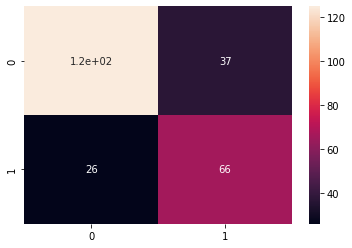

In [ ]:
sns.heatmap(confusion_matrix(Y_test, predictions), annot=True)
plt.show()

## Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
#prediction
rndm_predict = rfc.predict(X_test)

In [ ]:
#accuracy score
test_data_accuracy = accuracy_score(rndm_predict, Y_test)
print('Accuracy score of the Random Forest model: ', test_data_accuracy)

Accuracy score of the Random Forest model:  0.7755905511811023


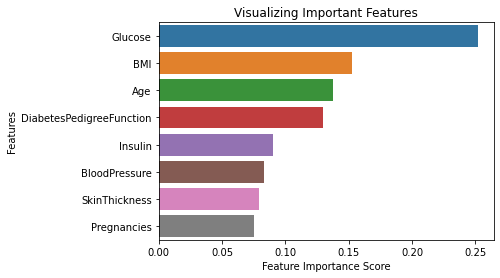

In [ ]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

In [ ]:
print(confusion_matrix(Y_test,rndm_predict))
print(classification_report(Y_test,rndm_predict))

[[137  25]
 [ 32  60]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       162
           1       0.71      0.65      0.68        92

    accuracy                           0.78       254
   macro avg       0.76      0.75      0.75       254
weighted avg       0.77      0.78      0.77       254



In [ ]:
confusion_matrix(Y_test,rndm_predict)
pd.crosstab(Y_test, rndm_predict, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,137,25,162
1,32,60,92
All,169,85,254


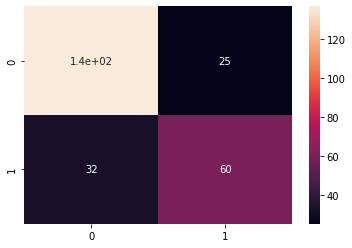

In [ ]:
sns.heatmap(confusion_matrix(Y_test, rndm_predict), annot=True)
plt.show()

## XgBoost classifier

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, Y_train)

XGBClassifier()

In [ ]:
#prediction
xgb_pred = xgb_model.predict(X_test)

In [ ]:
#accuracy score
test_data_accuracy = accuracy_score(xgb_pred, Y_test)
print('Accuracy score of the XgBoost: ', test_data_accuracy)

Accuracy score of the XgBoost:  0.7795275590551181


In [ ]:
#confusion matrix
print(confusion_matrix(Y_test, xgb_pred))
print(classification_report(Y_test,xgb_pred))

[[133  29]
 [ 27  65]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       162
           1       0.69      0.71      0.70        92

    accuracy                           0.78       254
   macro avg       0.76      0.76      0.76       254
weighted avg       0.78      0.78      0.78       254



In [ ]:
confusion_matrix(Y_test,rndm_predict)
pd.crosstab(Y_test, xgb_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,133,29,162
1,27,65,92
All,160,94,254


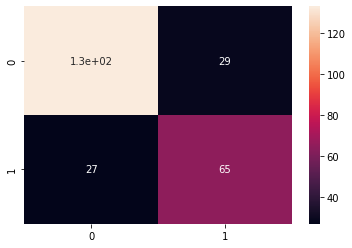

In [ ]:
sns.heatmap(confusion_matrix(Y_test, xgb_pred), annot=True)
plt.show()

Building a predictive system

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)


prediction = svc_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


***Saving the trained model***

In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(svc_model,open(filename,'wb'))

In [ ]:
#oading the saved model
loaded_model = pickle.load(open('diabetes_model.sav','rb'))

Checking the saved model

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)


prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
